# Strategy Benchmark

In [1]:
from backtest import *
from data_preparation import *
import pandas as pd

## Strategy Demo

In [2]:
period = "35d"
interval = "5m"
ticker_list = ['MSFT']
ticker = ticker_list[0]

In [3]:
init_balance = 10000

df, last_update = refresh(ticker, period=period, interval = interval)

bnh = buy_n_hold(init_balance, df)

Asset: 9720.82 (Profit:-2.79%)


Balance: 10408.26 (Profit:4.08%, # of Trade:13, Win:38.46%, avg: win 0.53% / lose -0.22%)


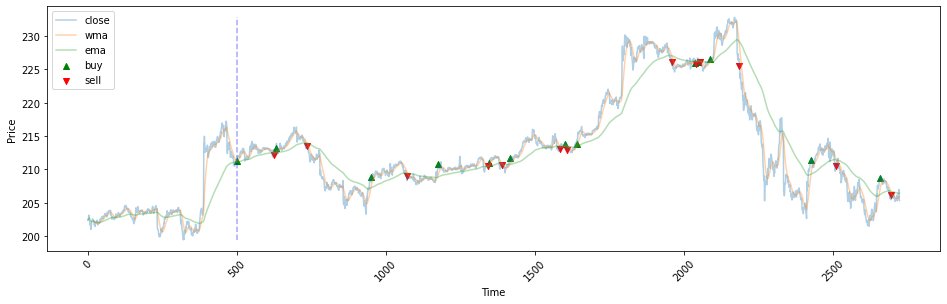

In [4]:
from strategy.strategy_wma import *
wma = Strategy_WMA()

df_wma = wma.prep_data(df, 21, 145)
test(init_balance, df_wma, wma.sell_or_buy, output="oneline", verbose=False)
plot_wma(df_wma, signals=buy_sell(df_wma, wma.sell_or_buy))

Balance: 10467.54 (Profit:4.68%, # of Trade:43, Win:44.19%, avg: win 0.43% / lose -0.33%)


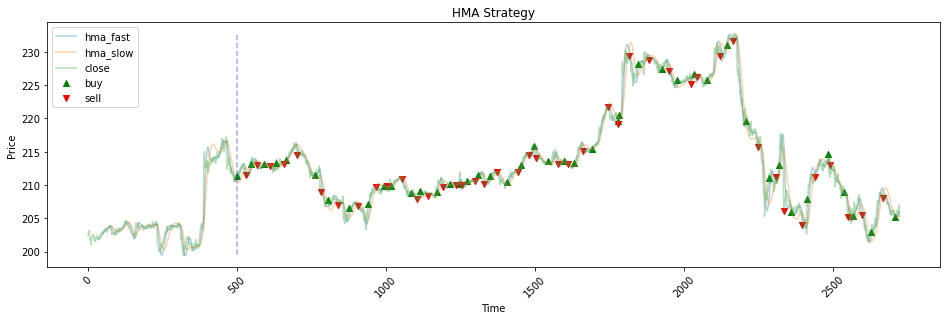

In [5]:
from strategy.strategy_hma import *
hma = Strategy_HMA()

df_hma = hma.prep_data(df, 34, 66)
test(init_balance, df_hma, hma.sell_or_buy)
plot_hma(df_hma, signals=buy_sell(df_hma, hma.sell_or_buy))

Balance: 10117.77 (Profit:1.18%, # of Trade:16, Win:25.00%, avg: win 0.55% / lose -0.51%)


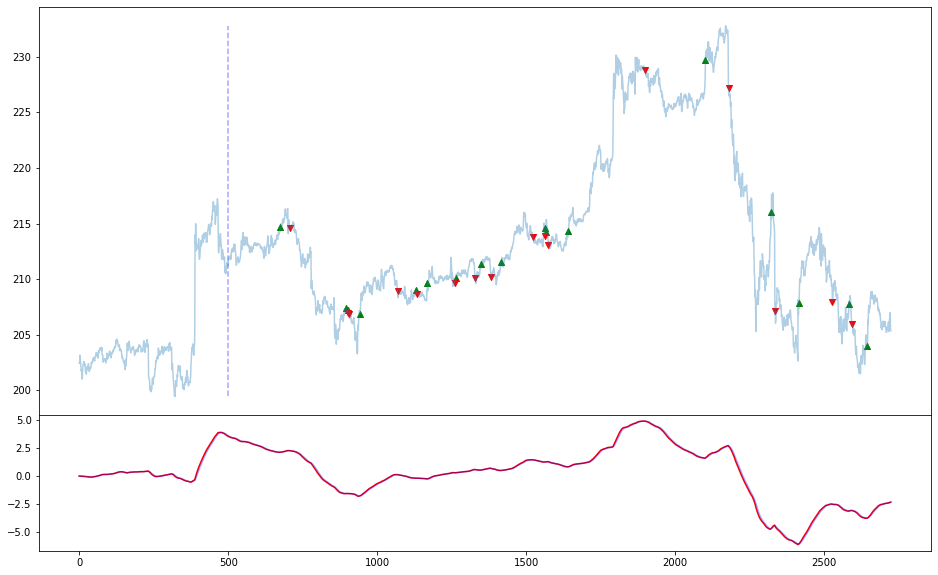

In [6]:
from strategy.strategy_macd import *
macd = Strategy_MACD()

df_macd = macd.prep_data(df, 145, 377)
test(init_balance, df_macd, macd.sell_or_buy, verbose = False)
plot_macd(df_macd, signals=buy_sell(df_macd, macd.sell_or_buy))

Balance: 10101.73 (Profit:1.02%, # of Trade:14, Win:42.86%, avg: win 0.51% / lose -0.38%)


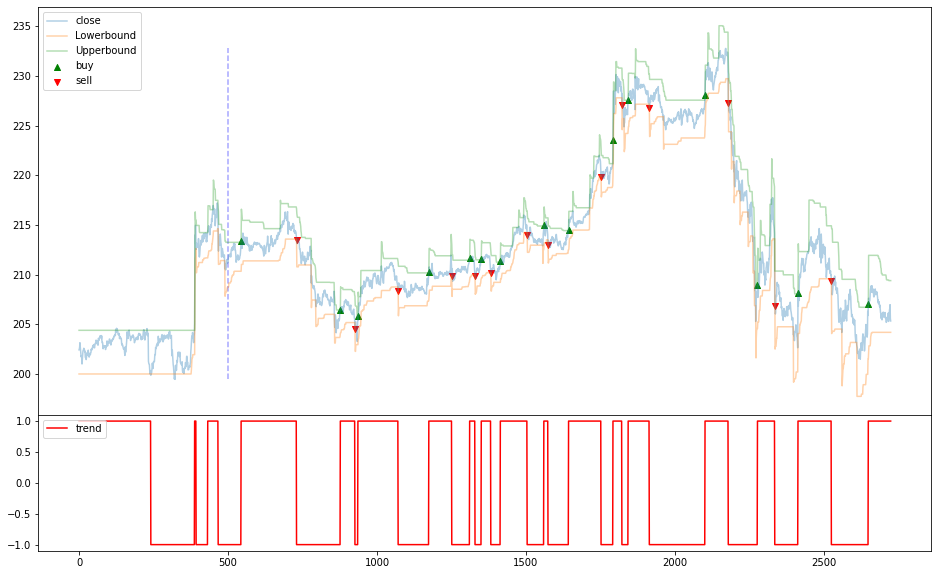

In [7]:
from strategy.strategy_supertrend import *
supertrend = Strategy_SuperTrend()

st_df = supertrend.prep_data(df, 5, 377)
test(init_balance, st_df, supertrend.sell_or_buy)
plot_supertrend(st_df, signals=buy_sell(st_df, supertrend.sell_or_buy))

Balance: 10124.35 (Profit:1.24%, # of Trade:8, Win:50.00%, avg: win 0.86% / lose -0.48%)


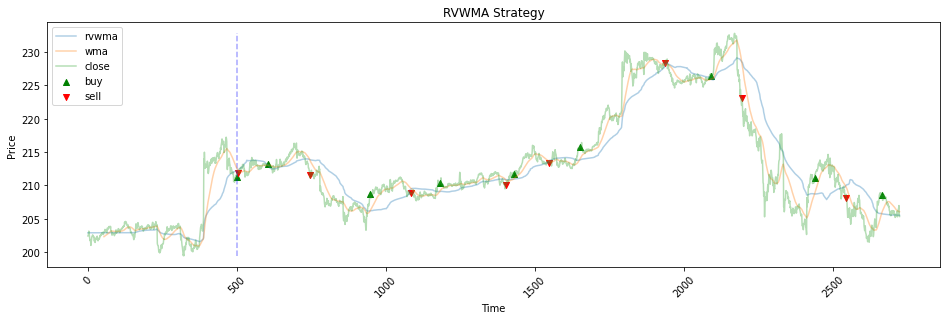

In [8]:
from strategy.strategy_rvwma import *
rvwma = Strategy_RVWMA()

df_rvwma = rvwma.prep_data(df, 145, 55)
test(init_balance, df_rvwma, rvwma.sell_or_buy)
plot_rvwma(df_rvwma, signals=buy_sell(df_rvwma, rvwma.sell_or_buy))

## Parameter Tuning

In [9]:
import yaml
from datetime import datetime

config = "sample_config\config_sample.yaml"
trade_limint = 10

with open(config, "r") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
ticker_strategy = config["ticker_strategy"] if "ticker_strategy" in config else None

if ticker_strategy:
    ticker_list = list(ticker_strategy.keys())
else:
    ticker_list = config['watch_list']


#ticker_list = ['AAPL', 'SBUX']
#ticker_list = ['O']


fib_seq = [13, 21, 34, 55, 89, 144, 233, 377, 610]
fib1_seq = [14, 22, 35, 56, 90, 145, 234, 378, 611]
reversal = [0.001, 0.002, 0.005, 0.0075, 0.01, 0.02, 0.03, 0.04, 0.05]
multipiler = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6.0]


now =  datetime.now()
today = f"{now.month}/{now.day}/{now.year}"

In [10]:
picks = []
picks += run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, wma, False)
picks += run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, macd, False)
picks += run_strategy(ticker_list, multipiler, fib_seq, period, interval, supertrend)
picks += run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, hma)
picks += run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, rvwma)

print(f"Done! Total number of picks: {len(picks)}")

picks = [pick for pick in picks if pick[2] <= trade_limint]
picks.sort(reverse=True, key=lambda i: i[1])

for i in range(min(len(picks), 10)):
    print(
        "  The #{} config is ({}) profit margin is {:.4f}%. # of Trade is {}".format(
            i + 1,
            picks[i][0],
            picks[i][1],
            picks[i][2])
        )
print(f"strategy: [{picks[0][0][0]}, {picks[0][0][1]}, {picks[0][0][2]}] # {today}")

Running Benchmark for wma...
run_strategy finished in 12.092099 secs.                                        
Running Benchmark for macd...
run_strategy finished in 5.316202 secs.                                         
Running Benchmark for supertrend...
run_strategy finished in 7.250366 secs.                                         
Running Benchmark for hma...
run_strategy finished in 47.352217 secs.                                        
Running Benchmark for rvwma...
run_strategy finished in 12.038153 secs.                                        
Done! Total number of picks: 74
  The #1 config is (['wma', 233, 145]) profit margin is 6.4160%. # of Trade is 8.0
  The #2 config is (['wma', 233, 35]) profit margin is 5.5900%. # of Trade is 9.5
  The #3 config is (['wma', 233, 90]) profit margin is 5.2000%. # of Trade is 8.0
  The #4 config is (['hma', 144, 145]) profit margin is 5.0928%. # of Trade is 8.0
  The #5 config is (['wma', 144, 234]) profit margin is 4.8441%. # of Trade is

In [11]:
for ticker in ticker_list:
    print(f"Updating {ticker} ...")
    picks = []
    picks += run_strategy([ticker], fib_seq, fib1_seq, period, interval, wma, False)
    picks += run_strategy([ticker], fib_seq, fib1_seq, period, interval, macd, False)
    picks += run_strategy([ticker], multipiler, fib_seq, period, interval, supertrend)
    picks += run_strategy([ticker], fib_seq, fib1_seq, period, interval, hma)
    picks += run_strategy([ticker], fib_seq, fib1_seq, period, interval, rvwma)
    
    picks = [pick for pick in picks if pick[2] <= trade_limint]
    picks.sort(reverse=True, key=lambda i: i[1])
    for i in range(0, min(len(picks), 10)):
        print(
            "  The #{} config is {}, Profit margin: {:.4f}%, # of Trade: {}".format(
                i + 1,
                picks[i][0],
                picks[i][1],
                picks[i][2])
            )
   
    ticker_strategy[ticker]  = picks[0][0] if picks else []

print("All Done!")
    
for ticker in ticker_list:
    if ticker_strategy[ticker]:
        print(f"  {ticker}: [{ticker_strategy[ticker][0]}, {ticker_strategy[ticker][1]}, {ticker_strategy[ticker][2]}] # {today}")
    else:
        print(f"  {ticker}: [] # {today}")


Updating INTC ...
Running Benchmark for wma...
run_strategy finished in 7.157616 secs.                                         
Running Benchmark for macd...
run_strategy finished in 3.813862 secs.                                         
Running Benchmark for supertrend...
run_strategy finished in 4.730583 secs.                                         
Running Benchmark for hma...
run_strategy finished in 25.370729 secs.                                        
Running Benchmark for rvwma...
run_strategy finished in 7.688737 secs.                                         
  The #1 config is ['wma', 233, 145], Profit margin: 7.9305%, # of Trade: 9.0
  The #2 config is ['hma', 144, 145], Profit margin: 7.8247%, # of Trade: 9.0
  The #3 config is ['wma', 233, 90], Profit margin: 7.5982%, # of Trade: 10.0
  The #4 config is ['wma', 377, 22], Profit margin: 5.9811%, # of Trade: 10.0
  The #5 config is ['wma', 377, 35], Profit margin: 5.8990%, # of Trade: 9.0
  The #6 config is ['rvwma', 34, 